In [ ]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

In [2]:
df=pd.DataFrame()

In [3]:
#df['SP500']=quandl.get("YAHOO/INDEX_GSPC", authtoken=token)['Adjusted Close']
df['SP500']=quandl.get("CHRIS/CME_ES1", authtoken=token).Last
#df['Yale_Housing']=quandl.get("YALE/CPIQ", authtoken=token)
df['10Year']=quandl.get("CHRIS/CME_TY1", authtoken=token).Last
df['Dax']=quandl.get('CHRIS/EUREX_FDAX1',authtoken=token).Settle
df['Oil']= quandl.get('CHRIS/ICE_B2', authtoken=token).Settle 
df['Wheat']=quandl.get('CHRIS/CME_W1', authtoken=token).Settle
df['Gold']=quandl.get('CHRIS/CME_GC1', authtoken=token).Settle
df['EUR'] = quandl.get('FED/RXI_US_N_B_EU',authtoken=token)
#df['US_GDP']=quandl.get("FRED/GDP", authtoken=token).VALUE
#df['FF']=quandl.get("FRED/FEDFUNDS", authtoken=token)
#df['S&P']=quandl.get("CHRIS/CME_ES1", authtoken=token).Last
#df['IG_Credit']=quandl.get("COM/CDXNAHY", authtoken=token)
#df['US_Electricity']=quandl.get("EIA/IES_2_2_2_USA", authtoken=token)
#df['US_Unemployement Rate']=quandl.get("ODA/USA_LUR", authtoken=token)

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':
/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


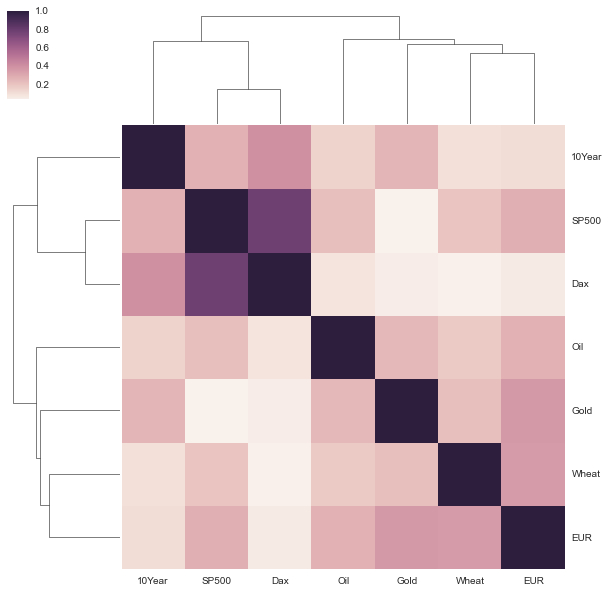

In [4]:
sns.clustermap(abs(df.resample(rule='m',how='last').pct_change().corr()).fillna(0))

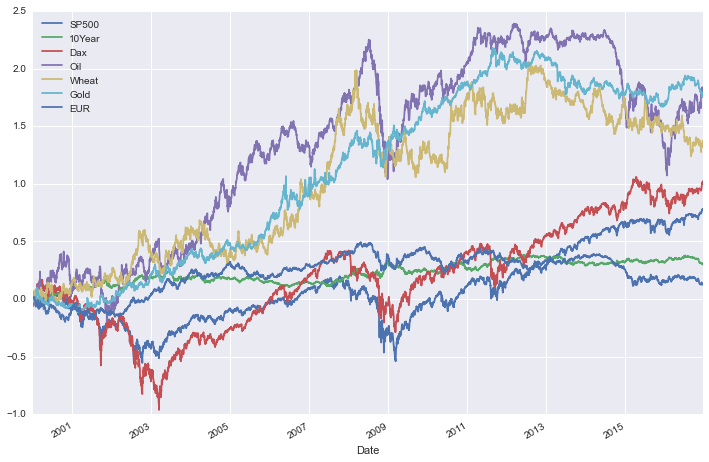

In [5]:
df.ffill()['2000':].pct_change().cumsum().plot()

In [6]:
df=df.resample(rule='m',how='last').pct_change()['2000':]

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [7]:
def trend(val):
    if (val > 0):
        return 1
    elif (val <= 0):
        return 0
Y = df.SP500.apply(trend).shift(-1)[:-1]

#Logistic Regression

In [8]:
X2 = df.copy().dropna()[:-1]

X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
logit = linear_model.LogisticRegression(C=1)
logit.fit(X_train, Y_train)
predicted = logit.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(logit.score(X_test,Y_test))

0.738461538462
0.585365853659


#KNN 

In [9]:
X2 = df.copy().dropna()[:-1]

X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
knn = neighbors.KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(knn.score(X_test,Y_test))

0.72131147541
0.585365853659


#Gaussian Naive Bayes

In [10]:
X2 = df.copy().dropna()[:-1]
 
X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
 
clf = GaussianNB()
clf.fit(X_train, Y_train)
predicted = clf.predict(X_test)
print(metrics.f1_score(Y_test, predicted))
print(clf.score(X_test,Y_test))

0.655737704918
0.487804878049


# Gradient Boosting & AdaBoost

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
X_train = X2[:int(len(X2)*.8)]
Y_train = Y[:int(len(X2)*.8)]
X_test = X2[int(len(X2)*.8):]
Y_test = Y[int(len(X2)*.8):]
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1,
                                  max_depth=1,random_state=0)
model.fit(X_train,Y_train)
#predicted = model.predicted(X_test)
#print(metrics.f1_score(Y_test, predicted))
print(model.score(X_test,Y_test))

0.560975609756
